<a href="https://colab.research.google.com/github/KrystynaKan/Pumpkin_Analysis/blob/main/PROJECT_Pumpkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data import

In [72]:
! git clone https://github.com/KrystynaKan/Pumpkin_Analysis.git

fatal: destination path 'Pumpkin_Analysis' already exists and is not an empty directory.


https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset - link to the dataset used in this project

This dataset contains information about two types of pumpkin seeds. Using supervised machine learning I'll classify seeds to two categories:


1.   Çerçevelik
2.   Ürgüp Sivrisi

Machine learning methods used in this project:


*  logistic reggression
*  KNN
*  SVM
*  Bagging Classifier


In [73]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import plotly
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [75]:
data = pd.read_excel('Pumpkin_Analysis/Pumpkin_Seeds_Dataset.xlsx')

In [76]:
data.sample(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
1630,98780,1217.112,484.1061,260.7588,99684,354.6415,0.8425,0.9909,0.7216,0.8379,1.8565,0.7326,Ürgüp Sivrisi
1420,83732,1214.192,518.2639,206.9515,84592,326.5132,0.9168,0.9898,0.6045,0.7137,2.5043,0.6300,Ürgüp Sivrisi
460,72433,1082.509,440.8155,210.3908,73140,303.6850,0.8788,0.9903,0.7269,0.7768,2.0952,0.6889,Çerçevelik
2357,99873,1361.049,597.0859,213.8179,100795,356.5982,0.9337,0.9909,0.7824,0.6775,2.7925,0.5972,Ürgüp Sivrisi
430,88653,1119.885,420.8444,269.7345,89471,335.9710,0.7676,0.9909,0.7130,0.8883,1.5602,0.7983,Çerçevelik
1690,60793,1057.876,456.6684,171.1951,61707,278.2158,0.9271,0.9852,0.7144,0.6826,2.6675,0.6092,Ürgüp Sivrisi
2384,74336,1099.841,449.0647,211.5007,75287,307.6484,0.8821,0.9874,0.7426,0.7722,2.1232,0.6851,Ürgüp Sivrisi
1144,102333,1273.388,500.5511,261.6773,103529,360.9632,0.8525,0.9884,0.6833,0.7931,1.9129,0.7211,Çerçevelik
1641,76540,1141.584,482.8894,202.2106,77130,312.1758,0.9081,0.9924,0.5479,0.7380,2.3881,0.6465,Ürgüp Sivrisi
2436,104308,1379.447,589.7301,227.0772,105614,364.4298,0.9229,0.9876,0.6574,0.6888,2.5970,0.6180,Ürgüp Sivrisi


In [77]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [79]:
data.describe(include=['object'])

,Class
count,2500
unique,2
top,Çerçevelik
freq,1300


In [80]:
X = data.drop('Class', axis=1)
y = data['Class']

In [81]:
y

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

In [82]:
y.value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

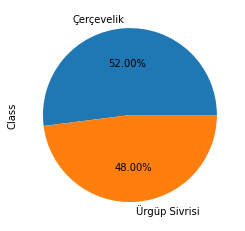

In [83]:
data["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [84]:
# cm = np.corrcoef(data.iloc[:,0:12].values.T)

# heatmap = sns.heatmap(cm, annot=True)
# plt.show()

# Split to train and test data

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [86]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2000, 12)
X_test shape: (500, 12)
y_train shape: (2000,)
y_test shape: (500,)


# Data standardization

Changing classes type from objest to integer:
*   'Çerçevelik' = 0
*   'Ürgüp Sivrisi' = 1


In [87]:
# y_train = pd.get_dummies(y_train, columns=['Class'], drop_first=True)
y_train = y_train.replace('Çerçevelik',0)
y_train = y_train.replace('Ürgüp Sivrisi',1)
# 'Çerçevelik' = 0
# 'Ürgüp Sivrisi' = 1

In [88]:
y_train

727     0
1929    1
1177    0
1589    1
1820    1
       ..
2228    1
584     0
73      0
1260    0
1001    0
Name: Class, Length: 2000, dtype: int64

'Çerçevelik' = 0 <br>
'Ürgüp Sivrisi' = 1

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [90]:
sc = StandardScaler()    #all columns are numeric type
df_sc = sc.fit_transform(X_train)

In [91]:
X_train_sc = pd.DataFrame(df_sc, columns=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'])

In [92]:
X_train_sc

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,0.111969,-0.035815,-0.132772,0.346281,0.107967,0.154923,-0.164039,0.233318,0.360092,0.405600,-0.384536,0.307096
1,1.468039,1.650688,1.638615,0.414245,1.454023,1.440498,0.950185,0.730652,-2.140057,-0.970210,0.913087,-0.964191
2,1.230943,0.849597,0.216763,1.737770,1.231756,1.224925,-0.858182,0.150429,0.613375,0.496254,-0.892876,0.904129
3,-1.268761,-0.891942,-0.319335,-1.755953,-1.286257,-1.315654,1.035548,0.813540,-1.860629,-0.828008,1.053558,-1.084727
4,-0.857886,-0.162738,0.445707,-1.780050,-0.831644,-0.857255,1.417440,-1.562607,0.284924,-1.645673,1.816384,-1.687411
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.779188,1.342335,1.107759,1.406564,1.765426,1.718158,0.132488,0.730652,-1.313210,0.322056,-0.113673,0.018937
1996,1.563560,0.893535,0.246629,2.226072,1.557560,1.526355,-1.215363,0.426726,0.119881,1.061510,-1.102323,1.182871
1997,-0.864413,-1.141251,-1.249976,0.094733,-0.862604,-0.864383,-1.210870,-0.236385,0.162368,1.139721,-1.099803,1.171570
1998,-0.294772,-0.626008,-0.876440,0.656901,-0.282782,-0.258698,-1.240074,-0.623200,0.386237,1.118391,-1.116181,1.184754


# Logistic Regression

In [93]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)

LogisticRegression()

In [94]:
y_train

727     0
1929    1
1177    0
1589    1
1820    1
       ..
2228    1
584     0
73      0
1260    0
1001    0
Name: Class, Length: 2000, dtype: int64

In [95]:
coefs = pd.DataFrame([X_train_sc.columns, model.coef_.T]).T
coefs

,0,1
0,Area,[1.9854658090712989]
1,Perimeter,[-1.3406711507012485]
2,Major_Axis_Length,[0.270616334839215]
3,Minor_Axis_Length,[-0.7312298573433618]
4,Convex_Area,[1.817578513738515]
5,Equiv_Diameter,[-2.0890903843458846]
6,Eccentricity,[-2.068258662645419]
7,Solidity,[0.631868708193697]
8,Extent,[-0.010199579461348899]
9,Roundness,[-1.0782551744421267]


In [96]:
y_pred_train = model.predict(X_train_sc)   #porównanie jak dobrze model przewidział dane na których się uczył
# y_pred = model.predict(X_test)         #z danymi testowymi kt jeszcze nie widział , a ma przewidzieć

print(y_pred_train)

[0 1 0 ... 0 0 1]


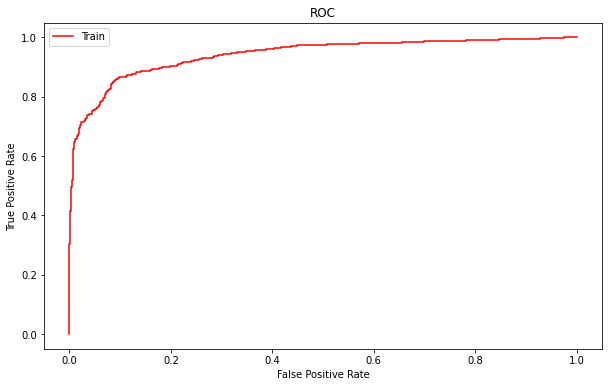

In [123]:
#krzywa ROC

y_pred_train_lr_proba = model.predict_proba(X_train_sc)
y_pred_lr_proba = model.predict_proba(X_test)

from sklearn.metrics import roc_curve

fpr_t, tpr_t, tresholds_t = roc_curve(y_train, y_pred_train_lr_proba[:,1])
# fpr, tpr, tresholds = roc_curve(y_test, y_pred_lr_proba[:,1])

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
# plt.plot(fpr, tpr, label ='Test', c = 'blue')
plt.plot(fpr_t, tpr_t, label = 'Train', c = 'red')
plt.legend()
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [98]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)

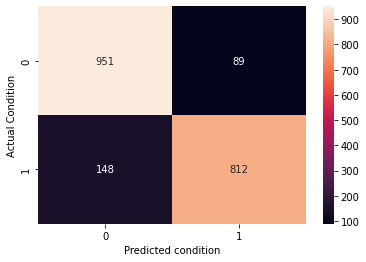

In [122]:
import seaborn as sns
%matplotlib inline

heatmap = sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted condition')
plt.ylabel('Actual Condition')

plt.show()

In [100]:
cm_train

array([[951,  89],
       [148, 812]])

# Logistic Regression - results

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8815
Precision: 0.9012208657047724
Recall: 0.8458333333333333
F1-Score: 0.8726491133799031


In [102]:
# cm = confusion_matrix(y_test, y_pred)   #nasze dane ze zbioru  treningowego
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()

# Logistic Regression z regularyzacją L2

In [124]:
#Regularyzacja Logistyczna z regularyzacją L2

rlr = LogisticRegression(penalty ='l2', C=0.5)
rlr.fit(X_train_sc, y_train)  

y_pred_train_rlr = rlr.predict(X_train_sc)
# y_pred_rlr = rlr.predict(X_test)

# print(y_pred_train_rlr)
# print(y_test.values)

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

# Logistic Regression z regularyzacją L2 - wyniki

In [105]:
print_results(calculate_metrics(y_train, y_pred_train_rlr), 'RLR L2')

Results for RLR L2
----
  Accuracy:  0.881
  Precision: 0.8817203347111604
  Recall:    0.881
  F1 score:  0.8808058045241144
  Mislabeled 238 out of 2000




# Grid Search dla Logistic Regression z regularyzacją L2

In [106]:
from sklearn.model_selection import GridSearchCV 
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(rlr, parameters)
searcher.fit(X_train_sc, y_train)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 100}
Best CV accuracy 0.883


# KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=100, metric='manhattan')
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=100)

# KNN wyniki

In [108]:
print_results(calculate_metrics(y_train, y_pred_train), 'kNN')

Results for kNN
----
  Accuracy:  0.8815
  Precision: 0.8825587179950696
  Recall:    0.8815
  F1 score:  0.8812558661474587
  Mislabeled 237 out of 2000




# SVM

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(C = 0.1, kernel="linear")
svm.fit(X_train_sc,y_train)
y_pred_train = svm.predict(X_train_sc)
# y_pred = svm.predict(X_test)

# SVM - wyniki

In [110]:
confusion_matrix(y_train, y_pred_train)

array([[951,  89],
       [148, 812]])

In [111]:
print_results(calculate_metrics(y_train, y_pred_train), 'SVM')

Results for SVM
----
  Accuracy:  0.8815
  Precision: 0.8825587179950696
  Recall:    0.8815
  F1 score:  0.8812558661474587
  Mislabeled 237 out of 2000




# SVM z Grid Search - wyniki

In [112]:
svm = SVC(kernel="linear")
svm.fit(X_train_sc,y_train)

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train_sc, y_train)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 100}
Best CV accuracy 0.8809999999999999


In [113]:
# pipe = Pipeline(steps = [('sc', StandardScaler()), ('poly', PolynomialFeatures()), ('lr', LinearRegression())])
# pipe = pipe.fit(X_train, y_train)
# print(pipe.score(X_train, y_train))
# print(pipe.score(X_test, y_test))

# Bagging Classifier - wyniki

In [114]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bg=BaggingClassifier(base_estimator=DecisionTreeClassifier())
bg.fit(X_train_sc,y_train)
y_pred_train=bg.predict(X_train_sc)
print_results(calculate_metrics(y_train, y_pred_train), 'BaggingClassifier')

Results for BaggingClassifier
----
  Accuracy:  0.9875
  Precision: 0.9877052512398635
  Recall:    0.9875
  F1 score:  0.9874933549284063
  Mislabeled 25 out of 2000




# Modyfikacja danych testowych

In [115]:
X_test

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
574,66922,988.420,376.4136,227.9987,67537,291.9036,0.7957,0.9909,0.7121,0.8608,1.6509,0.7755
2145,85361,1128.448,439.4500,248.4933,86223,329.6741,0.8248,0.9900,0.7643,0.8424,1.7685,0.7502
1048,68147,990.116,380.1906,228.9568,68743,294.5632,0.7983,0.9913,0.6934,0.8735,1.6605,0.7748
2397,91096,1232.652,505.9213,230.9714,92311,340.5687,0.8897,0.9868,0.5680,0.7534,2.1904,0.6732
1841,65376,1052.245,446.9055,186.5714,65968,288.5122,0.9087,0.9910,0.6307,0.7420,2.3954,0.6456
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,80651,1164.794,460.8584,224.5742,81652,320.4498,0.8732,0.9877,0.6596,0.7470,2.0521,0.6953
1909,83111,1164.216,482.6408,220.6774,83841,325.3002,0.8893,0.9913,0.6121,0.7706,2.1871,0.6740
2449,84152,1189.509,503.6442,213.4090,84747,327.3311,0.9058,0.9930,0.6913,0.7474,2.3600,0.6499
2178,80769,1130.348,464.1034,222.6008,81408,320.6841,0.8775,0.9922,0.7668,0.7944,2.0849,0.6910


In [116]:
y_test

574        Çerçevelik
2145    Ürgüp Sivrisi
1048       Çerçevelik
2397    Ürgüp Sivrisi
1841    Ürgüp Sivrisi
            ...      
2044    Ürgüp Sivrisi
1909    Ürgüp Sivrisi
2449    Ürgüp Sivrisi
2178    Ürgüp Sivrisi
1641    Ürgüp Sivrisi
Name: Class, Length: 500, dtype: object

In [117]:
y_test = y_test.replace('Çerçevelik',0)
y_test = y_test.replace('Ürgüp Sivrisi',1)

In [118]:
df_sc_test = sc.transform(X_test)
X_test_sc = pd.DataFrame(df_sc_test, columns=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'])

In [119]:
# Regresja logistyczna
y_pred_lr = model.predict(X_test_sc)
print_results(calculate_metrics(y_test, y_pred_lr), 'LogisticRegression')



Results for LogisticRegression
----
  Accuracy:  0.87
  Precision: 0.8717656789763053
  Recall:    0.87
  F1 score:  0.8696123213631736
  Mislabeled 65 out of 500




In [120]:
bg.estimators_[0].feature_importances_

array([0.00839039, 0.04757174, 0.06151517, 0.03590908, 0.01038025,
       0.0321126 , 0.01488821, 0.07166416, 0.04655031, 0.04082826,
       0.58273806, 0.04745176])

In [121]:
y_pred_bg = bg.predict(X_test_sc)
print_results(calculate_metrics(y_test, y_pred_bg), 'Bagging Classifier')

Results for Bagging Classifier
----
  Accuracy:  0.886
  Precision: 0.8879086589143514
  Recall:    0.886
  F1 score:  0.8856600356569367
  Mislabeled 57 out of 500


